# How to use scri with NRSur7dq4 modes?

## Useful Links

Pip: https://pypi.org/project/scri/

GitHub: https://github.com/moble/scri

Tutorial: https://scri.readthedocs.io/en/latest/tutorial_waveformmodes.html 

Documentation: https://scri.readthedocs.io/en/latest/_autosummary/scri.html

## Prefix 

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import gwsurrogate as gws
import gwtools
import scri

lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [2]:
# optional: load matplotlib style sheet (only if you have one)
plt.style.use("~/MA/fertige-MA/gitrepo/MATPLOTLIB_RCPARAMS.sty")
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [3]:
# load the NR surrogate
sur = gws.LoadSurrogate('NRSur7dq4')

Loaded NRSur7dq4 model


## Create WaveformMode object

In [4]:
# example configuration
q = 2
chi1 = [-0.19, -0.68, 0.]
chi2 = [0.1, 0., 0.7]

dt = 0.1        # timestep size, Units of M
f_low = 0       # initial frequency, f_low=0 returns the full surrogate

# generating modes with NRSur7dq4
# h is a dictionary of available modes with (l, m) tuples as keys
t, h, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low)    

In [5]:
# NRSur7dq4 available modes
ell_min = 2
ell_max = 4

# prepare and create WaveformMode object
data = list(h.values())
data = np.array(data).T

waveform_modes = scri.WaveformModes(
    dataType=scri.h,             # dateType strain
    t=t,                         # time array
    data=data,                   # strain data
    ell_min=ell_min,             
    ell_max=ell_max,
    frameType=scri.Inertial,     # modes ininertial frame 
    r_is_scaled_out=True,        # lumonosity distance scaled out
    m_is_scaled_out=True,        # total mass scaled out
)

## Applying functions 

### energy flux in dependence on time

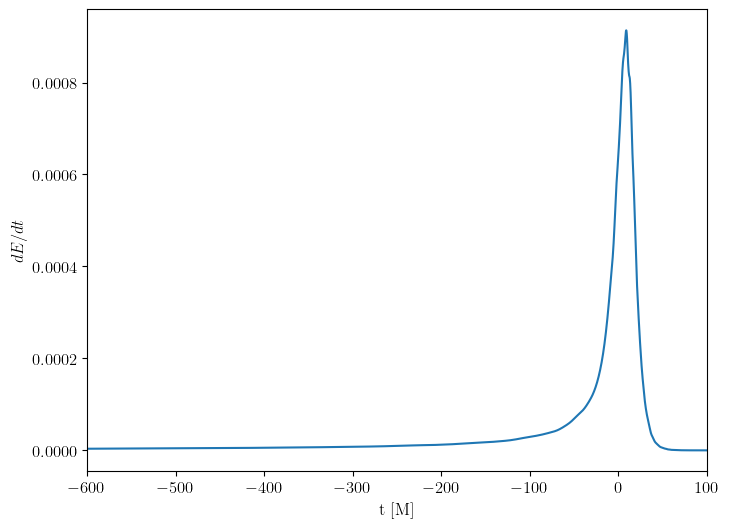

In [6]:
energy_flux = waveform_modes.energy_flux() 

# plotting
fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(111)
ax1.plot(t, energy_flux)
ax1.set_ylabel('$dE/dt$')
ax1.set_xlabel('t [M]')
ax1.set_xlim(-600,100)
plt.show()

fig.tight_layout()

### momentum flux in dependence on time

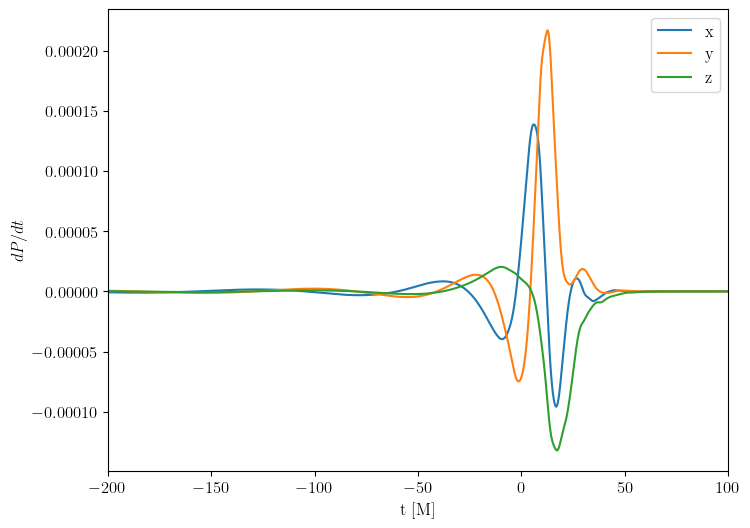

In [7]:
momentum_flux = waveform_modes.momentum_flux() 

# plotting
fig = plt.figure()
ax1 = fig.add_subplot(111)
coordinate_list = ['x', 'y', 'z']
for i in range(3):
    ax1.plot(t, momentum_flux[:,i], label='%s' %(coordinate_list[i]) )
ax1.set_ylabel('$dP/dt$')
ax1.set_xlabel('t [M]')
ax1.set_xlim(-200,100)
ax1.legend()
plt.show()

fig.tight_layout()

### Coprecessing frame modes

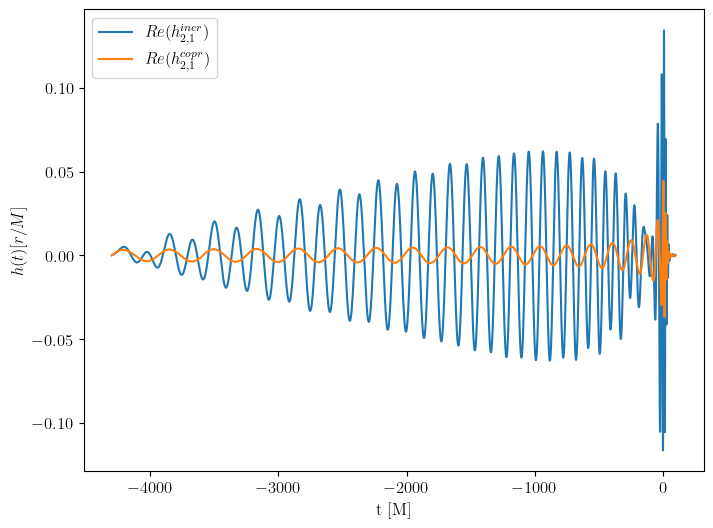

In [8]:
waveform_modes.to_coprecessing_frame()
data_in_copr_frame = waveform_modes.data.T 

# build dictonary
mode_list = [(ell,m) for ell in range(ell_min, ell_max+1) for m in range(-ell,ell+1)]
h_in_copr_frame = dict(zip(mode_list, data_in_copr_frame))     

# plotting
fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(111)
ax1.plot(t, np.real(h[(2,1)]), label='$Re(h_{2,1}^{iner})$')
ax1.plot(t, np.real(h_in_copr_frame[(2,1)]), label='$Re(h_{2,1}^{copr})$')
ax1.set_ylabel('$h(t) [r/M]$')
ax1.set_xlabel('t [M]')
ax1.legend()
plt.show()

### Other useful funtions

In [9]:
# corotating waveform modes
waveform_modes.to_corotating_frame()

# Returns the data array with a derivative with respect to time
waveform_modes.data_dot

# compute the angular momentum flux
waveform_modes.angular_momentum_flux()


array([[ 9.84873309e-16, -1.07116764e-16,  1.51493724e-14],
       [ 1.42820532e-16, -3.77262119e-16, -2.97032164e-14],
       [ 1.10714211e-16, -1.58910804e-17,  4.60402846e-15],
       ...,
       [-3.88364279e-14, -3.86375980e-14,  1.73642421e-13],
       [ 4.19957603e-13,  3.33707344e-13, -6.39123134e-12],
       [-1.61197278e-12, -1.25368409e-12,  2.53039740e-11]])

### Frame dictonary function

In [10]:
# frame function
def modes_from_iner_to_new_frame(t, h, frame):
    '''
    Transforms a dictionary of modes in the inertial frame into the coprecessing or corotating frame
    t: time array
    h: dict of available modes with (l, m) tuples as keys and complex strain of the modes as values
    frame: str for coprecessing or corotating frame
    '''
    
    # available NRSur7dq4 modes
    ell_min = 2
    ell_max = 4
    mode_list = [(ell,m) for ell in range(ell_min, ell_max+1) for m in range(-ell,ell+1)]

    # build scri WaveformModes object
    data = list(h.values())
    data = np.array(data).T
    waveform_modes = scri.WaveformModes(
                            dataType=scri.h,
                            t=t,
                            data=data,
                            ell_min=ell_min,
                            ell_max=ell_max,
                            frameType=scri.Inertial,
                            r_is_scaled_out=True,
                            m_is_scaled_out=True,
                            )
    
    # apply scri transformation functions
    if frame == 'coprecessing':
        waveform_modes.to_coprecessing_frame()
        data_in_new_frame = waveform_modes.data.T
        
    if frame == 'corotating':
        waveform_modes.to_corotating_frame()
        data_in_new_frame = waveform_modes.data.T 
    
    # build dictonary similar to input form
    h_in_new_frame = dict(zip(mode_list, data_in_new_frame))
    
    return h_in_new_frame

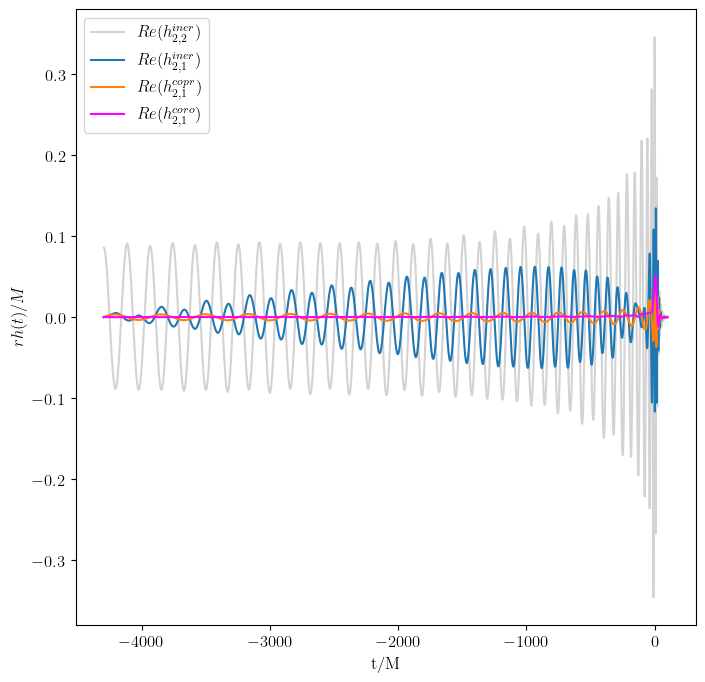

In [11]:
h_in_copr_frame = modes_from_iner_to_new_frame(t, h, 'coprecessing')
h_in_coro_frame = modes_from_iner_to_new_frame(t, h, 'corotating')

# plotting
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.plot(t, np.real(h[(2,2)]), label='$Re(h_{2,2}^{iner})$', color='lightgrey')
ax1.plot(t, np.real(h[(2,1)]), label='$Re(h_{2,1}^{iner})$')
ax1.plot(t, np.real(h_in_copr_frame[(2,1)]), label='$Re(h_{2,1}^{copr})$')
ax1.plot(t, np.real(h_in_coro_frame[(2,1)]), label='$Re(h_{2,1}^{coro})$', color='magenta')
ax1.set_ylabel('$r h(t)/M$')
ax1.set_xlabel('t/M')
ax1.legend()
plt.show()

fig.tight_layout()